<a href="https://colab.research.google.com/github/DogWoodX/BufferDog/blob/master/Copy_of_Box_Plots_Explore_Your_Own_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis With Python
Sometimes we need more powerful tools to analyze our data. We will be using the Python programming language and two amazingly powerful Python libraries called pandas and Matplotlib. 

Next to each cell you should see \[ \]. Click on this tab to run the cell and import these two packages. 

In [ ]:
# Import the package pandas and rename it in our code as pd
import pandas as pd
# Import the package matplotlib and rename it to plt
import matplotlib.pyplot as plt
# Other IO
from google.colab import files
import io

We will be using the U.S. Census American Community Survey which consists of anonymized information about the lives of real Americans. 

Choose a state that you would like to explore! 
[Make sure to click the \[\] button next to the cell after making or changing your selection!

In [ ]:
state_of_interest = "Oregon" #@param ["Alabama", "Alaska", "Hawaii", "Iowa", "Massachusetts", "New Mexico", "Oregon"]

# This is a dictionary that stores a mapping from our state names to the csv
# files that hold the data for each state. The first link corresponds to the
# people data and the second for the household data.
data_links = {
    "Alabama":(
        "https://drive.google.com/file/d/1a4_0Ac9HYz73jJ2vEDzpJXZSREiK0EnX/view?usp=sharing",
        "https://drive.google.com/file/d/1EIVlMZIbl0UgldqD8pIHBVc6rG77yAZ-/view?usp=sharing"
    ),
    "Massachusetts": ( 
        "https://drive.google.com/file/d/1lCgNZlUkiIogKbxhe3lbEBDeqphtLFZ8/view?usp=sharing",
        "https://drive.google.com/file/d/1q_Zb2FWPN_B1EQNCNhUuzuZA4PDF3oaY/view?usp=sharing"
    ),
    "New Mexico": (
        "https://drive.google.com/file/d/1ZfowpPwSZf7q2X15VEixJEstSZiWbz5t/view?usp=sharing",
        "https://drive.google.com/file/d/1Ojws6ux7DnzJ6qM0AYYYMG2S7ZxsbyF1/view?usp=sharing"
    ),
    "Oregon": (
        "https://drive.google.com/file/d/1Cg6EBRSttWuQMg8l7thF8GngPMEinPtk/view?usp=sharing",
        "https://drive.google.com/file/d/1cA9QSXkKz09TL5yIQ6wYc722NvhTLgwS/view?usp=sharing"
    ),
    "Iowa": (
        "https://drive.google.com/file/d/1EN1JPHz4JbL-oAAehSyY7Dmrq_BBI6Km/view?usp=sharing",
        "https://drive.google.com/file/d/1Xn9dw9BzuwqppB217BxPMDLG8uPuQDMS/view?usp=sharing"
    ),
    "Hawaii": (
        "https://drive.google.com/file/d/1ByzvSSY83JssZUimi4CI5cwVVzBI44mn/view?usp=sharing",
        "https://drive.google.com/file/d/1jnQvhCJW1LwwN-mnrCvcwu0Dav5jBQje/view?usp=sharing"
    ),
    "Alaska": (
        "https://drive.google.com/file/d/1SWZpexRTL8pqKa3NIW4wLDQwWewOclw6/view?usp=sharing",
        "https://drive.google.com/file/d/1we_AvX5nBqv6Qr8w2tR2Pk6qQufneBod/view?usp=sharing"
    )
}

# Here we are turning the shareable google drive link into a downloadable csv.
def drive_to_pandas(share_link):
  """ Downloads a CSV in Google drive to a pandas dataframe. """
  download_link = 'https://drive.google.com/uc?export=download&id=' + share_link.split('/')[-2]
  # Finally we use the download link to download our data from the web
  return pd.read_csv(download_link)

person_url, household_url = data_links[state_of_interest]
person_data = drive_to_pandas(person_url)
household_data = drive_to_pandas(household_url)

The first step whenever you have a new dataset is to get a sense of which features (the columns like Age, Wages, etc) you have access to.

In [ ]:
# Our microdata csv is now in the dataframe variable.
# We can call the method "head()" on df to print out the first 5 rows.
person_data.head()

,AgeInYears,TravelTimeToWorkInMinutes,NumberOfPeopleInCarpool,HoursWorkedWeeklyInPastYear,TotalIncomeInDollars
0,51,NaN,NaN,NaN,40000.0
1,17,NaN,NaN,NaN,3000.0
2,13,NaN,NaN,NaN,NaN
3,48,25.0,1.0,40.0,15000.0
4,63,NaN,NaN,NaN,31400.0


In [ ]:
household_data.head()

,WaterCostInDollars,FireHazardFloodInsuranceYearlyCostInDollars,GrossRentAsPercentOfIncome,NumberOfChildrenInHousehold,NumberOfPeopleInHousehold
0,NaN,900.0,NaN,0.0,2
1,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,1
3,NaN,NaN,29.0,0.0,1
4,NaN,NaN,101.0,2.0,3


Let's explore the distribution of one of the variables of our data. Choose one of the variables from the dropdown and then run the rest of the code!

Make sure to remember to run the \[ \] next to the dropdown and all code if you want to update it.

In [ ]:
variable_to_explore = "WaterCostInDollars" #@param ['WaterCostInDollars', 'FireHazardFloodInsuranceYearlyCostInDollars','GrossRentAsPercentOfIncome', 'NumberOfChildrenInHousehold','NumberOfPeopleInHousehold', 'AgeInYears', 'TravelTimeToWorkInMinutes', 'NumberOfPeopleInCarpool','HoursWorkedWeeklyInPastYear', 'TotalIncomeInDollars']

df = household_data if variable_to_explore in household_data.columns else person_data

# Old Tools
We still have access to all the same statistical tools and tests that we have been used to! Let's explore those.


In [ ]:
# Calculate and print the mean.
mean = df[variable_to_explore].mean()
print(f"Mean of {variable_to_explore} is {round(mean,3)}\n")

# Calculate and print the median.
median = df[variable_to_explore].median()
print(f"Median of {variable_to_explore} is {round(median,3)}\n")

# Calculate and print the mode.
mode = float(df[variable_to_explore].mode())
print(f"Mode of {variable_to_explore} is {round(mode,3)}\n")

# Calculate the quartiles
minv = float(df[variable_to_explore].min())
q2 = float(df[variable_to_explore].quantile(q=0.25))
q3 = float(df[variable_to_explore].quantile(q=0.75))
maxv = float(df[variable_to_explore].max())
print(f"Quartiles of {variable_to_explore} are {round(minv, 3)}, {round(q2, 3)}, {round(q3, 3)}, {round(maxv, 3)}\n")

Mean of TotalIncomeInDollars is 43396.682

Median of TotalIncomeInDollars is 28000.0

Mode of TotalIncomeInDollars is 0.0

Quartiles of TotalIncomeInDollars are -7000.0, 9800.0, 57000.0, 944000.0



# When excel won't cut it.
Sometimes we need even more powerful graphical or statistical tools. Let's see what we can do in python! 

In [ ]:
include_outliers = False #@param {type:"boolean"}
num_bins = 32 #@param {type:"slider", min:0, max:100, step:1}
symbol = 'X' if include_outliers else ''
bounds = (5, 95) if include_outliers else (0,100)

# Helper for later...
def get_user_file():
  uploaded = files.upload()
  csv_name = list(uploaded.keys())[0]
  try:
    return pd.read_csv(io.BytesIO(uploaded[csv_name]))
  except:
    print("Something is wrong with your CSV! Did you choose the right file?")
    return pd.DataFrame()

In [ ]:
df[variable_to_explore]

0         40000.0
1          3000.0
2             NaN
3         15000.0
4         31400.0
           ...   
42075    160000.0
42076     31800.0
42077     90000.0
42078         0.0
42079     63000.0
Name: TotalIncomeInDollars, Length: 42080, dtype: float64

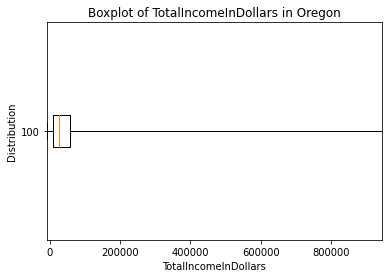

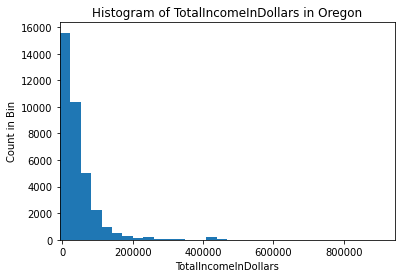

In [ ]:
# Define the range of the Y axis
ranges = [df[variable_to_explore].min() - 5, df[variable_to_explore].max() + 5]

# Create the box and whiskers (boxplot)
plt.boxplot(df[variable_to_explore].dropna(), vert=False, sym=symbol, whis=bounds)
plt.title(f"Boxplot of {variable_to_explore} in {state_of_interest}")
plt.ylabel("Distribution")
plt.xlabel(variable_to_explore)
plt.yticks(ticks=[1], labels=["100"])
plt.xlim(ranges)
plt.show()

# Create the histogram
plt.hist(df[variable_to_explore].dropna(), bins=num_bins)
plt.title(f"Histogram of {variable_to_explore} in {state_of_interest}")
plt.ylabel("Count in Bin")
plt.xlabel(variable_to_explore)
plt.xlim(ranges)
plt.show()

# Explore your data!
Let's see how these state-wide results compare to your survey results. 

1.   Make sure that the column names that you collected match the ones used in this Colab: WaterCostInDollars, FireHazardFloodInsuranceYearlyCostInDollars, GrossRentAsPercentOfIncome, NumberOfChildrenInHousehold,NumberOfPeopleInHousehold, AgeInYears, TravelTimeToWorkInMinutes, NumberOfPeopleInCarpool, HoursWorkedWeeklyInPastYear, TotalIncomeInDollars
2.   Download your data as CSV! In your Google Sheet, select File -> Download -> Comma separated values (CSV)
3. Re-Run the cell below and choose the CSV file that you downloaded.
-- 

In [ ]:
print("What's your name?")
student_name = input()

What's your name?


KeyboardInterrupt: ignored

In [ ]:
user_data = get_user_file()

In [ ]:
if variable_to_explore not in user_data.columns:
  print(f"You do not have {variable_to_explore} in your Sheet! Double check that it matches exactly and then reupload your file!")
else:
  fig, axs = plt.subplots(2, 2)

  def label_axes(axes, graph_type, transition_word, location, ranges):
      # axes.title.set_text(f"{graph_type} of {variable_to_explore} {transition_word} {location}")
      # axes.set_xlabel(variable_to_explore)
      axes.set_xlim(ranges)

  # Calculate shared range.
  ranges = [min(df[variable_to_explore].min(), user_data[variable_to_explore].min()) - 5,
          max(df[variable_to_explore].max(), user_data[variable_to_explore].max()) + 5]
  # Create various plots.
  state_data_for_var = df[variable_to_explore].dropna()
  user_data_for_var = user_data[variable_to_explore].dropna()
  print(f"Distribution of {variable_to_explore} in {state_of_interest} (Top) vs {student_name}'s Survey (Bottom)")
  axs[0, 0].boxplot(state_data_for_var, vert=False, sym=symbol, whis=bounds)
  label_axes(axs[0, 0], "Boxplot", "in", state_of_interest, ranges) 
  axs[0, 1].hist(state_data_for_var, bins=num_bins)
  label_axes(axs[0, 1], "Histogram", "in", state_of_interest, ranges) 
  axs[1, 0].boxplot(user_data_for_var, vert=False, sym=symbol, whis=bounds)
  label_axes(axs[1, 0], "Boxplot", student_name + "'s Survey", "for", ranges) 
  axs[1, 1].hist(user_data_for_var, bins=num_bins)
  label_axes(axs[1, 1], "Histogram", student_name + "'s Survey", "for", ranges) 